# ABO Blood Groups


<img src="https://www.tutorialspoint.com/biology_part2/images/blood_group.jpg"></img>
 
In this notebook we will analyze the world distribution of the different blood groups.

On the surface of the red blood cells (also known as erythrocytes) are expressed molecules that are determined on the genetic code of individuals. Among those molecules are two important ones, that determinate the blood type. The implication of those types is that individuals needing a blood transfussion can not ever receive blood from any other individual. Many people have to receive only the same type they have. Also, pregnant women that their babies have an incompatible blood type with their mothers are at risk of abortion or can generate a dangerous reaction on the mother, that may even cause the risk of death on the mother. Thus, the importance of testing the blood type on all the population. 

There are four groups that are responsible of the blood compatibility: 

-Group O: Is the most common blood group. People with this blood group can recieve blood only from the same type.

-Group A: Is the second most frequently found group. People with this group can recieve from A and O groups.

-Group B: Is the third type in frequency. People with this group can recieve from B and O groups.

-Group AB: Is the least type in frequency. People with this group can recieve blood from any type (A,B, and O).

Another molecule present in the red blood cells and which determines the compatibility of the blood is known as the <i> Rhesus D factor </i>. This factor was discovered in monkies (from here the name). When this factor is present we say that the blood type is Rh-positive (Rh+). When it is absent is considered Rh-negative (Rh-).
 
In summary, the combination of the ABO types and the Rhesus D factor results in Eight different possible blood types: O+, A+, B+, AB+, O-, A-, B-, AB-. 
 
In the present dataset we have the distribution of the eight blood types by country. We will analyze this data using the statistical knowledge we have learned. 




In [1]:
if(!require(ggfortify)) install.packages("ggfortify")
library(dplyr)

Loading required package: ggfortify
Loading required package: ggplot2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
path <- "../Data/"  ### update this to reflect your local paht !!!!
abo <- read.csv(paste(path,"blood_groups_world_distribution.csv",sep=""))
names(abo) <- c("Country","Population","O+","A+","B+","AB+","O-","A-","B-","AB-")

head(abo)

Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
Armenia,2931568,0.2900,0.4630,0.1200,0.0560,0.0200,0.0370,0.0100,4e-03
Norway,5330986,0.3300,0.4150,0.0680,0.0340,0.0600,0.0750,0.0120,6e-03
Cyprus,1189395,0.3522,0.4035,0.1111,0.0472,0.0385,0.0348,0.0087,4e-03
Portugal,10264672,0.3630,0.4000,0.0660,0.0290,0.0600,0.0660,0.0110,5e-03
Switzerland,8454321,0.3500,0.4000,0.0700,0.0300,0.0600,0.0700,0.0100,1e-02
Japan,126044340,0.2990,0.3980,0.1990,0.0990,0.0015,0.0020,0.0010,5e-04


In [3]:
summary(abo)

       Country     Population              O+               A+        
 Argentina : 1   Min.   :3.814e+04   Min.   :0.2463   Min.   :0.0870  
 Armenia   : 1   1st Qu.:5.541e+06   1st Qu.:0.3200   1st Qu.:0.2600  
 Australia : 1   Median :1.664e+07   Median :0.3800   Median :0.3100  
 Austria   : 1   Mean   :6.571e+07   Mean   :0.4007   Mean   :0.3032  
 Bahrain   : 1   3rd Qu.:4.907e+07   3rd Qu.:0.4620   3rd Qu.:0.3570  
 Bangladesh: 1   Max.   :1.388e+09   Max.   :0.8550   Max.   :0.4630  
 (Other)   :95                                                        
       B+              AB+                O-                A-         
 Min.   :0.0228   Min.   :0.00500   Min.   :0.00080   Min.   :0.00100  
 1st Qu.:0.0900   1st Qu.:0.03000   1st Qu.:0.01430   1st Qu.:0.00800  
 Median :0.1400   Median :0.04300   Median :0.04000   Median :0.02800  
 Mean   :0.1564   Mean   :0.04712   Mean   :0.03951   Mean   :0.03473  
 3rd Qu.:0.2070   3rd Qu.:0.06350   3rd Qu.:0.06000   3rd Qu.:0.06000  


# Please Answer to the following questions:

## 1. Which is the most common blood type: O+ or O-?

In [4]:
Oplus <- sum(abo$Population * abo$`O+`)
Ominus <- sum(abo$Population * abo$`O-`)
c(Oplus,Ominus)
Oplus > Ominus


[1] 2557531433  168352815

[1] TRUE

## 2. On how many countries the most common blood type is A?

In [5]:
abo2 <- abo
abo2$A_all <- abo2$`A+` + abo2$`A-` 

nA <- abo2 %>% arrange(desc(A_all)) %>% filter(A_all > `O+`) %>% tally()
N <- nrow(abo)

paste("There are ",nA,"countries within",N,"whith predominance of type A")

[1] "There are  45 countries within 101 whith predominance of type A"

## 3. Show the five countries with the higher percentage of AB types.

In [6]:
abo2 <- abo
abo2$AB_all <- abo2$`AB+` + abo2$`AB-` 

AB <- abo2 %>% arrange(desc(AB_all)) 
head(AB,5)


Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-,AB_all
North Korea,25432033,0.2715,0.3108,0.3015,0.1132,0.0008,0.0010,0.0010,0.0003,0.1135
South Korea,50748307,0.2790,0.3387,0.2692,0.1098,0.0010,0.0013,0.0008,0.0002,0.1100
Pakistan,180440005,0.2463,0.2060,0.3440,0.0952,0.0417,0.0266,0.0357,0.0045,0.0997
Japan,126044340,0.2990,0.3980,0.1990,0.0990,0.0015,0.0020,0.0010,0.0005,0.0995
Bangladesh,164833667,0.3118,0.2144,0.3458,0.0885,0.0139,0.0096,0.0096,0.0064,0.0949


## 4. How many people (and which percent of the total world population) has a negative Rh?

In [7]:
abo2 <- abo
## sum of all negative percentages
abo2$all_neg <- abo2$`O-` + abo2$`A-` + abo2$`B-` + abo2$`AB-` 
## calculate the (approximate) number of individuals
abo2$tot_neg <- abo2$Population * abo2$all_neg
## sum the number of individuals
neg_people <- sum(abo2$tot_neg)
## sum of total population
n_people <- sum(as.numeric(abo2$Population))
pct <- neg_people / n_people * 100

paste("There are about ",round(neg_people,0)," in the world, representing ",
      round(pct,2),"% of the total world population",sep="")


[1] "There are about 397137349 in the world, representing 5.98% of the total world population"

## 5. Is there a correlation between the distribution of Israel and the US?

In [8]:
israel <- abo %>% filter(Country=="Israel")
usa <- abo %>% filter(Country=="United States")
israel
usa


Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
Israel,8323659,0.32,0.34,0.17,0.07,0.03,0.04,0.02,0.01


Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
United States,326481533,0.374,0.357,0.085,0.034,0.066,0.063,0.015,0.006


In [9]:
cor.test(as.numeric(israel[,c(3:10)]), as.numeric(usa[,c(3:10)]))


	Pearson's product-moment correlation

data:  as.numeric(israel[, c(3:10)]) and as.numeric(usa[, c(3:10)])
t = 8.1811, df = 6, p-value = 0.0001797
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7795653 0.9925919
sample estimates:
      cor 
0.9579818 


In [10]:
print("There is a very high correlation between both countries!")

[1] "There is a very high correlation between both countries!"


## 6. Is there a statistical significant difference between the distribution of Israel and Russia?

In [11]:
israel <- abo %>% filter(Country=="Israel")
russia <- abo %>% filter(Country=="Russia")
israel
russia


Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
Israel,8323659,0.32,0.34,0.17,0.07,0.03,0.04,0.02,0.01


Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
Russia,143374801,0.28,0.3,0.2,0.07,0.049,0.058,0.032,0.011


In [12]:
t.test(as.numeric(israel[,c(3:10)]), as.numeric(russia[,c(3:10)]))


	Welch Two Sample t-test

data:  as.numeric(israel[, c(3:10)]) and as.numeric(russia[, c(3:10)])
t = 0, df = 13.677, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1362557  0.1362557
sample estimates:
mean of x mean of y 
    0.125     0.125 


In [13]:
print("There is a no significant statistical difference in the blood types distribution between Israel and Russia!")

[1] "There is a no significant statistical difference in the blood types distribution between Israel and Russia!"


## 7. Use different clustering techniques to classify the distribution of the eight blood cell types. Which cluster give a more logical segmentation?
 
Use the NbClust package to calculate the optimal number of clusters. Also use plots coloring the groups with the resulting clusters. You can use the autoplot function (ggfortify package) to see the cluster distribution. Pass the Country values as rownames so you can see each country on the graphs.

## 7a. NbClust

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


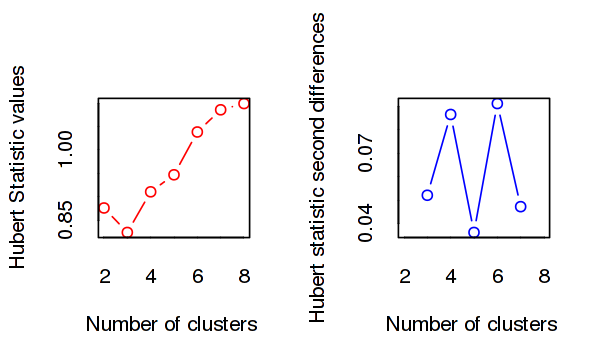

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 15 proposed 3 as the best number of clusters 
* 4 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


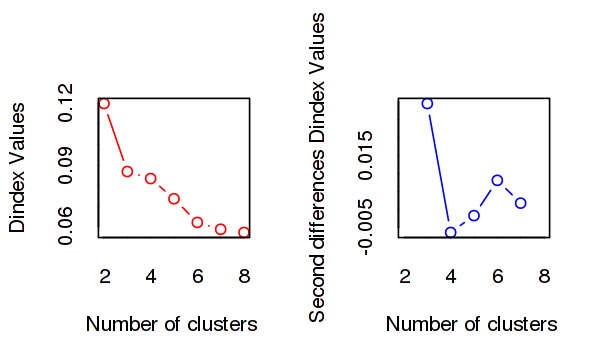

In [14]:
library(NbClust)

options(repr.plot.width = 5, repr.plot.height = 3)
res <- NbClust(abo[3:10], distance = "euclidean", min.nc=2, max.nc=8, method = "complete")


The reccomended number of clusters is 3.

## 7b.  k-Means

In [15]:
mod.km <- kmeans(abo[3:10], centers = 3)
table(mod.km$cluster)


 1  2  3 
53 24 24 

In [16]:
rownames(abo) <- abo$Country

abo2 <- abo
abo2$cluster <- mod.km$cluster

abo2 %>% group_by(cluster) %>% summarise(`O+`=mean(`O+`),`A+`=mean(`A+`),`B+`=mean(`B+`),`AB+`=mean(`AB+`),
                                        `O-`=mean(`O-`),`A-`=mean(`A-`),`B-`=mean(`B-`),`AB-`=mean(`AB-`))


cluster,O+,A+,B+,AB+,O-,A-,B-,AB-
1,0.3454679,0.3528208,0.1185642,0.04691698,0.05530943,0.055128302,0.018098113,0.007694340
2,0.5499583,0.2454542,0.1232583,0.02571667,0.03043750,0.015979167,0.007087500,0.002108333
3,0.3735958,0.2512833,0.2729542,0.06898333,0.01368333,0.008433333,0.008579167,0.002491667


In [17]:
if (!(require(ggmap))) install.packages("ggmap")

Loading required package: ggmap


In [18]:
map.world <- map_data("world")
abo2$Country <- recode(abo2$Country
                       ,'United States' = 'USA'
                       ,'United Kingdom' = 'UK')

map.world_joined <- left_join(map.world, abo2[,c("Country","cluster")], by = c('region' = 'Country'))

map.world_joined$cluster[which(is.na(map.world_joined$cluster))] <- 0

Warning message:
“Column `region`/`Country` joining character vector and factor, coercing into character vector”

In [19]:
map.world_joined <- map.world_joined %>% mutate(fill_flg = ifelse(is.na(cluster),F,T))

head(map.world_joined %>% filter(fill_flg==T))

long,lat,group,order,region,subregion,cluster,fill_flg
-69.89912,12.45200,1,1,Aruba,NA,0,TRUE
-69.89571,12.42300,1,2,Aruba,NA,0,TRUE
-69.94219,12.43853,1,3,Aruba,NA,0,TRUE
-70.00415,12.50049,1,4,Aruba,NA,0,TRUE
-70.06612,12.54697,1,5,Aruba,NA,0,TRUE
-70.05088,12.59707,1,6,Aruba,NA,0,TRUE


In [20]:
summary(map.world_joined)

      long              lat              group            order       
 Min.   :-180.00   Min.   :-85.192   Min.   :   1.0   Min.   :     1  
 1st Qu.: -67.86   1st Qu.:  1.795   1st Qu.: 381.0   1st Qu.: 25215  
 Median :  16.59   Median : 32.467   Median : 823.0   Median : 50492  
 Mean   :  10.52   Mean   : 24.969   Mean   : 801.3   Mean   : 50470  
 3rd Qu.:  78.95   3rd Qu.: 54.029   3rd Qu.:1243.0   3rd Qu.: 75746  
 Max.   : 190.27   Max.   : 83.600   Max.   :1627.0   Max.   :100964  
    region           subregion            cluster      fill_flg      
 Length:99338       Length:99338       Min.   :0.000   Mode:logical  
 Class :character   Class :character   1st Qu.:0.000   TRUE:99338    
 Mode  :character   Mode  :character   Median :1.000                 
                                       Mean   :1.116                 
                                       3rd Qu.:2.000                 
                                       Max.   :3.000                 

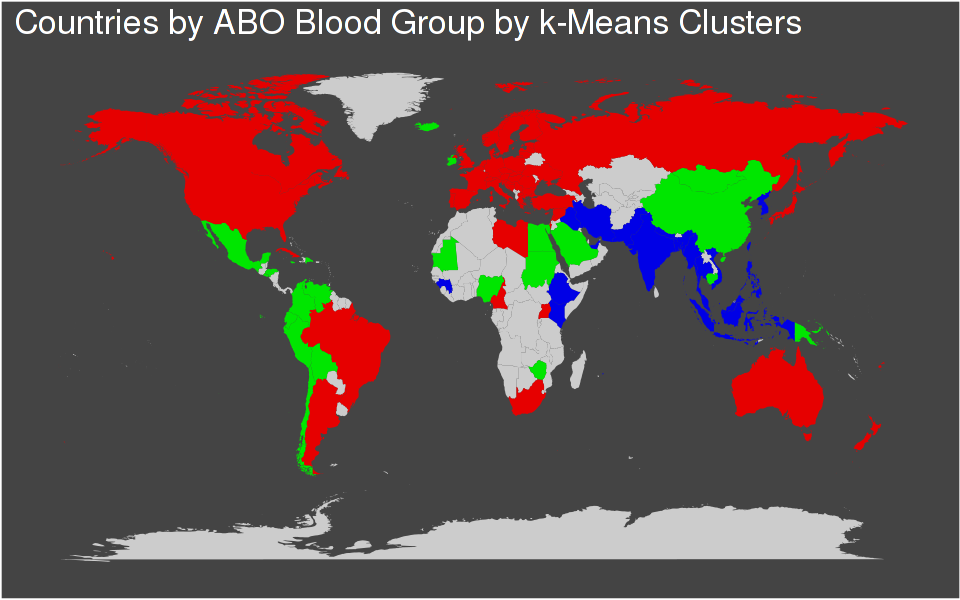

In [21]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot() +
  geom_polygon(data = map.world_joined, aes(x = long, y = lat, group = group, fill = factor(cluster))) +
  scale_fill_manual(values = c("#CCCCCC","#e60000","#00e600","#0000e6")) +
  labs(title = 'Countries by ABO Blood Group by k-Means Clusters') +
  theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
        ,panel.background = element_rect(fill = "#444444")
        ,plot.background = element_rect(fill = "#444444")
        ,panel.grid = element_blank()
        ,plot.title = element_text(size = 20)
        ,plot.subtitle = element_text(size = 10)
        ,axis.text = element_blank()
        ,axis.title = element_blank()
        ,axis.ticks = element_blank()
        ,legend.position = "none"
        )

## 7c. Hierarchical clustering

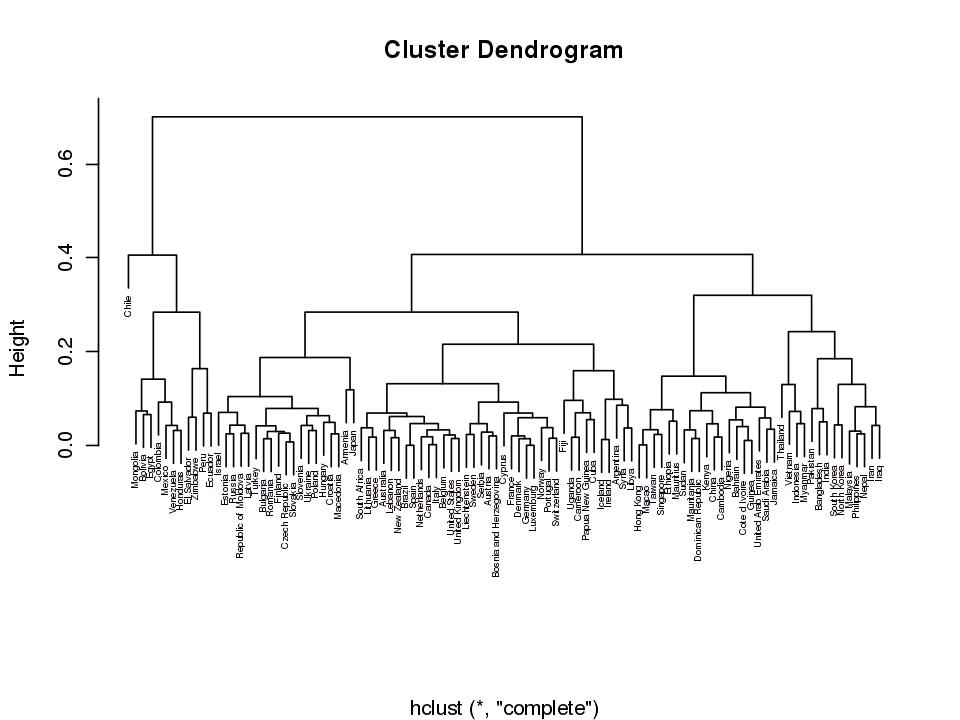

In [22]:
mod.hc <- hclust(dist(as.matrix(abo[,3:10])))

options(repr.plot.width = 8, repr.plot.height = 6)
plot(mod.hc, cex=0.45, xlab="")


In [23]:
cluster <- cutree(mod.hc, k = 3)

abo2 <- abo

abo2$cluster <- cluster

map.world_joined <- left_join(map.world, abo2[,c("Country","cluster")], by = c('region' = 'Country'))
map.world_joined$cluster[which(is.na(map.world_joined$cluster))] <- 0

map.world_joined <- map.world_joined %>% mutate(fill_flg = ifelse(is.na(cluster),F,T))
head(map.world_joined %>% filter(fill_flg==T))

Warning message:
“Column `region`/`Country` joining character vector and factor, coercing into character vector”

long,lat,group,order,region,subregion,cluster,fill_flg
-69.89912,12.45200,1,1,Aruba,NA,0,TRUE
-69.89571,12.42300,1,2,Aruba,NA,0,TRUE
-69.94219,12.43853,1,3,Aruba,NA,0,TRUE
-70.00415,12.50049,1,4,Aruba,NA,0,TRUE
-70.06612,12.54697,1,5,Aruba,NA,0,TRUE
-70.05088,12.59707,1,6,Aruba,NA,0,TRUE


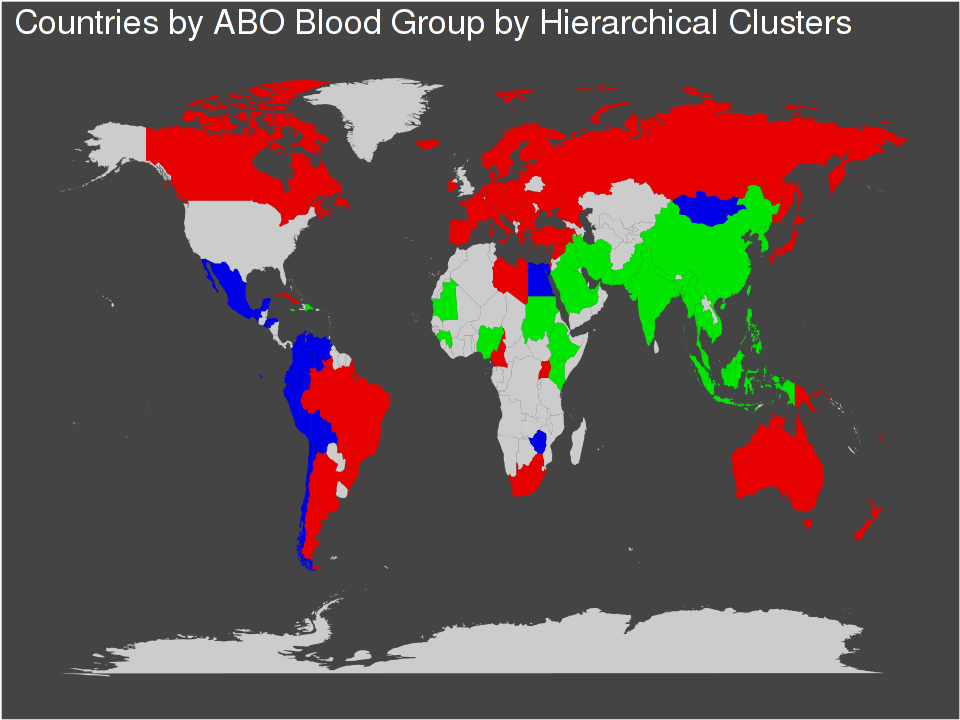

In [24]:
ggplot() +
  geom_polygon(data = map.world_joined, aes(x = long, y = lat, group = group, fill = factor(cluster))) +
  scale_fill_manual(values = c("#CCCCCC","#e60000","#00e600","#0000e6")) +
  labs(title = 'Countries by ABO Blood Group by Hierarchical Clusters') +
  theme(text = element_text(family = "Gill Sans", color = "#FFFFFF")
        ,panel.background = element_rect(fill = "#444444")
        ,plot.background = element_rect(fill = "#444444")
        ,panel.grid = element_blank()
        ,plot.title = element_text(size = 20)
        ,plot.subtitle = element_text(size = 10)
        ,axis.text = element_blank()
        ,axis.title = element_blank()
        ,axis.ticks = element_blank()
        ,legend.position = "none"
        )

## 8. Analyze the dataset using Principal Component Analysis (PCA).

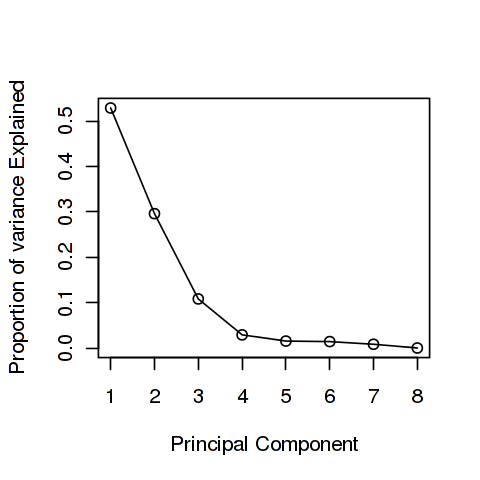

In [25]:
abo.pca <- prcomp(as.matrix(abo[3:10]),scale = T)
abo.var <- abo.pca$sdev^2

### percent explained by each principal component
abo.varpct <- abo.var/sum(abo.var)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(abo.varpct, type="o",xlab = "Principal Component",
     ylab="Proportion of variance Explained")

### 3 first component explain most of the variance...


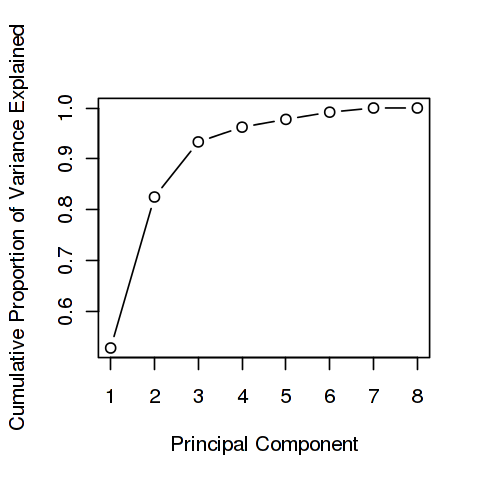

In [26]:
plot(cumsum(abo.varpct), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     type = "b")


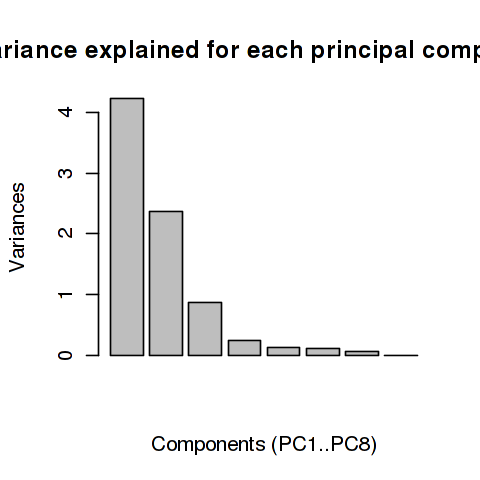

In [27]:
plot(abo.pca, main="Variance explained for each principal component", xlab="Components (PC1..PC8)")


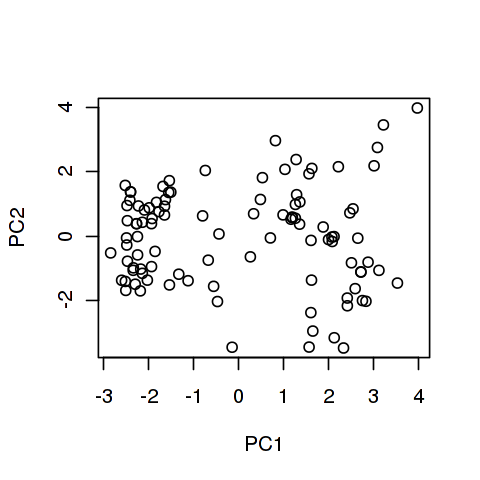

In [28]:
plot(abo.pca$x)

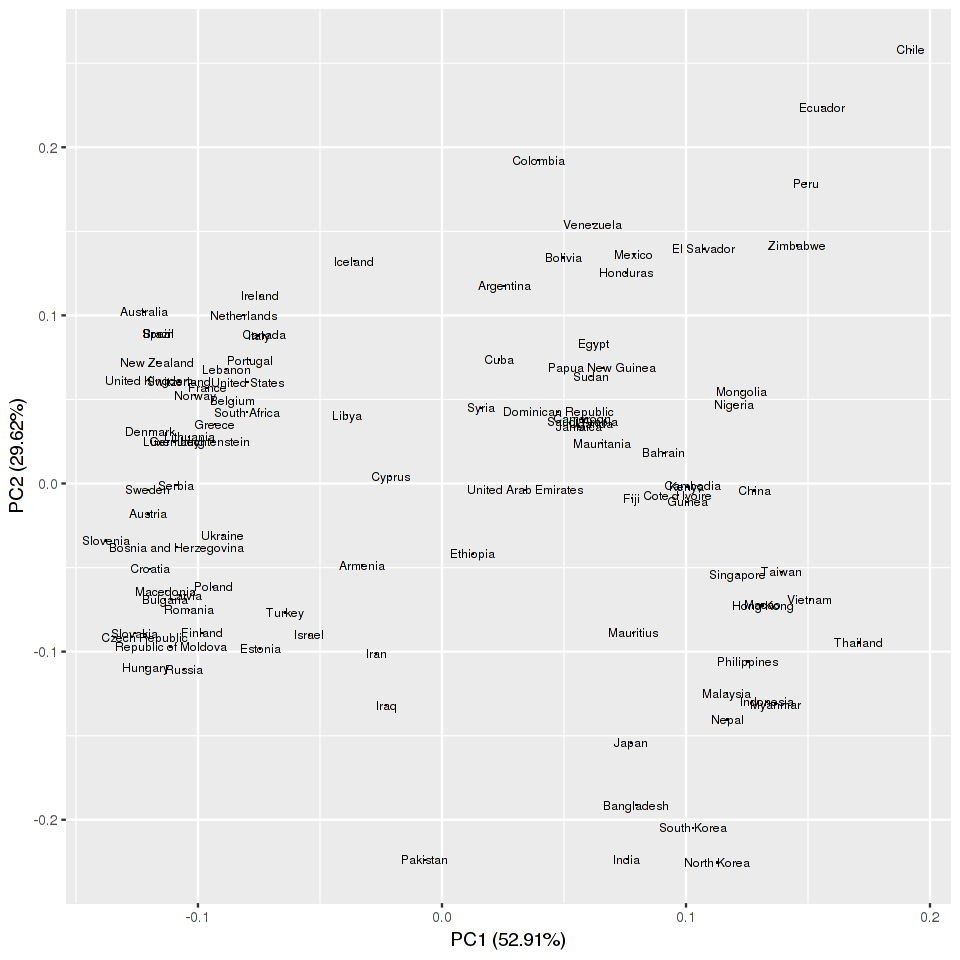

In [29]:
## plot the PCA possitioning of the countries
options(repr.plot.width = 8, repr.plot.height = 8)
autoplot(abo.pca, data=abo, label=T, label.size = 2.5, shape = ".")

Now lets use hierarchical clusters to see the classification of the countries by clusters

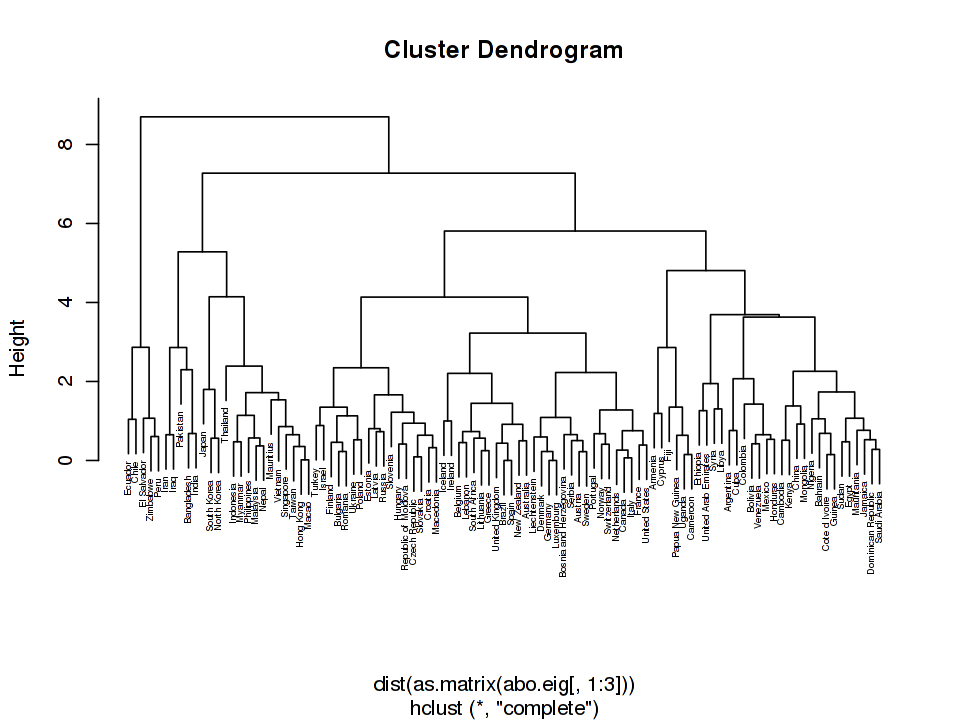

In [30]:
abo.eig <- data.frame(abo.pca$x)
rownames(abo.eig) <- abo$Country

abo.hc <- hclust(dist(as.matrix(abo.eig[,1:3])))

options(repr.plot.width = 8, repr.plot.height = 6)
plot(abo.hc, cex=0.45)


Warning message in if (value %in% columns) {:
“la condición tiene longitud > 1 y sólo el primer elemento será usado”Warning message in if (value %in% columns) {:
“la condición tiene longitud > 1 y sólo el primer elemento será usado”

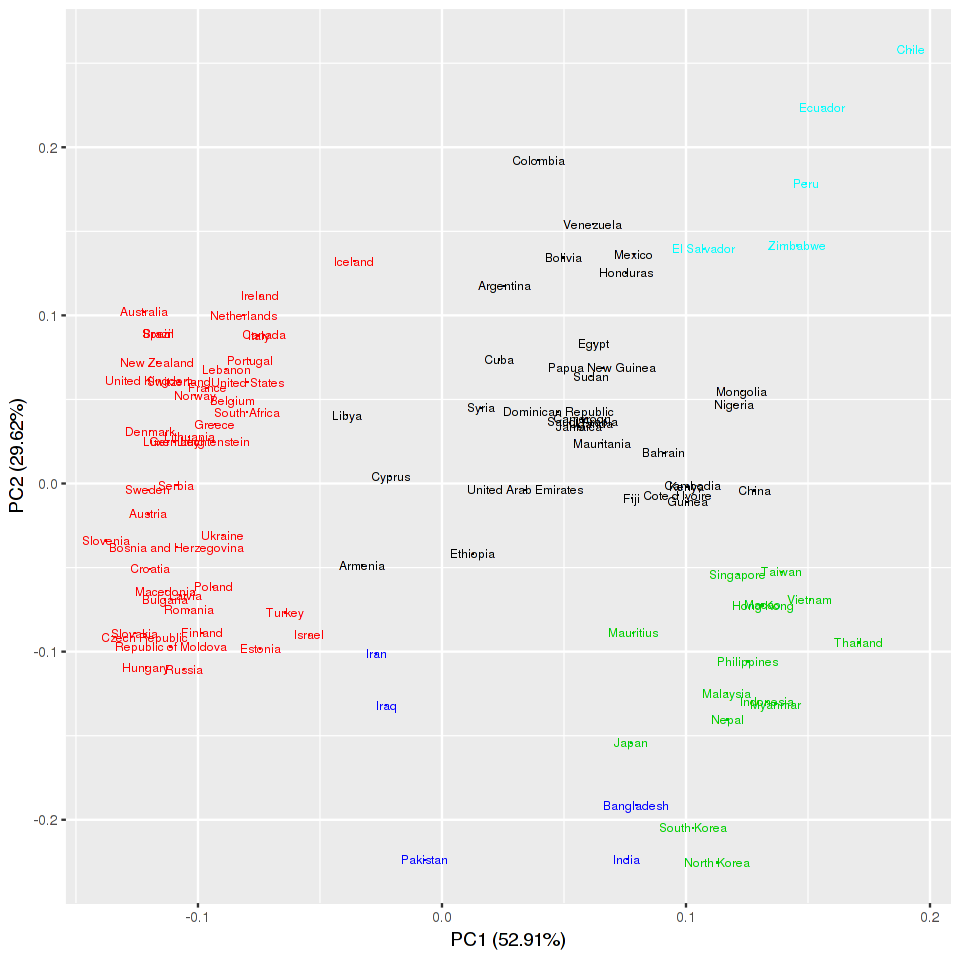

In [31]:
abo.clusters <- cutree(abo.hc,5)

options(repr.plot.width = 8, repr.plot.height = 8)
autoplot(abo.pca, data=abo, label=T, col=abo.clusters,label.size = 2.5, shape = ".")
#autoplot(abo.pca, data=abo, label=T, col=abo.clusters)